In [18]:
import numpy as np
import csv
import copy
import random
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import scipy
from scipy import stats


In [19]:
import sklearn
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared
from sklearn.metrics import mean_squared_error as mse


In [ ]:

#training_data = pd.read_excel('Data.xlsx')
#elem_prop_all = pd.read_excel('Elemental_properties.xlsx', 'Sheet1')

!wget Elemental_properties.csv
training_data = read_csv('Data.csv')

!wget https://github.com/mannodiarun/MSE570/blob/ff46db8bccb61fc6c47d538a0c3d9a6bae38c2a7/Elemental_properties.csv
elem_prop_all = read_csv('Elemental_properties.csv')


In [32]:
import pandas as pd
import requests
from io import StringIO

url = "https://raw.githubusercontent.com/mannodiarun/MSE570/main/Data.csv"
response = requests.get(url)
response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
training_data = pd.read_csv(StringIO(response.text))

url = "https://raw.githubusercontent.com/mannodiarun/MSE570/main/Elemental_properties.csv"
response = requests.get(url)
response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
elem_prop_all = pd.read_csv(StringIO(response.text))


In [33]:
training_data

,AB,atom_A,atom_B,structure,vol_pfu,delta_H,gap
0,BHf,B,Hf,s1,26.94,0.34,0.00
1,OsEr,Os,Er,s1,38.34,-0.15,0.00
2,NdDy,Nd,Dy,s1,67.76,0.20,0.00
3,CaTb,Ca,Tb,s1,71.50,0.34,0.00
4,BAl,B,Al,s1,21.54,1.65,0.00
...,...,...,...,...,...,...,...
1458,SrIr,Sr,Ir,s10,47.77,0.49,0.00
1459,TlC,Tl,C,s10,54.03,1.89,1.73
1460,SrMn,Sr,Mn,s10,52.34,1.53,0.00
1461,TiMn,Ti,Mn,s10,27.02,-0.09,0.00


In [35]:
elem_prop_all

,Element,Ion_rad,BP,MP,Density,At_wt,Cov_rad,Ion_Energy,Elec_Aff,At_vol,...,Sp_heat_cap,Therm_cond,Elec_cond,Heat_fusion,Heat_vap,Electronegativity,At_num,Period,Group,Ox_state
0,Li,0.76,1615.0,453.70,0.53,6.94,1.23,520.2,59.80,13.10,...,3.58,84.7,11.7,3.00,147.10,0.98,3,2,1,1
1,Na,1.02,1156.0,371.00,0.97,22.99,1.54,495.8,52.70,23.70,...,1.23,141.0,20.1,2.60,98.01,0.93,11,3,1,1
2,K,1.51,1033.0,336.80,0.86,39.10,2.03,418.8,48.36,45.46,...,0.76,102.5,16.4,2.33,76.90,0.82,19,4,1,1
3,Rb,1.61,961.0,312.63,1.53,85.47,2.16,403.0,46.89,55.90,...,0.36,58.2,47.8,2.34,69.20,0.82,37,5,1,1
4,Cs,1.74,944.0,301.54,1.87,132.91,2.35,375.7,45.49,71.07,...,0.24,35.9,5.3,2.09,67.74,0.79,55,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Ho,1.02,2968.0,1747.00,8.80,164.93,1.58,581.0,50.00,18.70,...,0.17,16.2,1.1,17.15,251.04,1.23,67,6,3,3
73,Er,1.00,3140.0,1802.00,9.07,167.26,1.57,589.0,50.00,18.40,...,0.17,14.3,1.2,17.15,292.88,1.24,68,6,3,3
74,Tm,1.09,2223.0,1818.00,9.32,168.93,1.56,596.0,50.00,18.10,...,0.16,16.8,1.3,16.80,191.00,1.25,69,6,3,3
75,Yb,0.99,1469.0,1092.00,6.97,173.04,1.70,603.0,50.00,24.79,...,0.15,34.9,3.7,7.70,128.00,1.10,70,6,3,3


In [34]:
training_data["gap"]

,gap
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
1458,0.00
1459,1.73
1460,0.00
1461,0.00


In [36]:
training_data[training_data['structure'] == 's6']

,AB,atom_A,atom_B,structure,vol_pfu,delta_H,gap
915,RbTa,Rb,Ta,s6,60.68,8.77,4.89
916,BW,B,W,s6,22.68,0.26,0.00
917,ScRe,Sc,Re,s6,34.67,0.51,0.00
918,ClTi,Cl,Ti,s6,40.30,-0.36,0.00
919,ZnHo,Zn,Ho,s6,50.19,0.30,0.00
...,...,...,...,...,...,...,...
1028,MgTe,Mg,Te,s6,74.06,-1.58,2.59
1029,AlSc,Al,Sc,s6,39.06,-0.79,0.00
1030,VCr,V,Cr,s6,25.21,0.37,0.00
1031,BSb,B,Sb,s6,38.97,1.32,0.00


In [37]:
training_data[training_data['delta_H'] < 0.0]

,AB,atom_A,atom_B,structure,vol_pfu,delta_H,gap
1,OsEr,Os,Er,s1,38.34,-0.15,0.00
6,ClCd,Cl,Cd,s1,48.55,-0.61,0.00
14,FeTa,Fe,Ta,s1,28.58,-0.21,0.00
16,CaCd,Ca,Cd,s1,57.17,-0.76,0.00
20,RuHo,Ru,Ho,s1,38.59,-0.66,0.00
...,...,...,...,...,...,...,...
1450,SnO,Sn,O,s10,35.69,-2.20,0.81
1451,CaS,Ca,S,s10,45.74,-3.78,2.15
1455,BrNd,Br,Nd,s10,84.42,-2.11,0.00
1457,NMn,N,Mn,s10,16.91,-5.58,0.00


In [38]:
df = pd.DataFrame(training_data)
df.query('vol_pfu < 50.0 and delta_H < 0.0')

,AB,atom_A,atom_B,structure,vol_pfu,delta_H,gap
1,OsEr,Os,Er,s1,38.34,-0.15,0.00
6,ClCd,Cl,Cd,s1,48.55,-0.61,0.00
14,FeTa,Fe,Ta,s1,28.58,-0.21,0.00
20,RuHo,Ru,Ho,s1,38.59,-0.66,0.00
26,IrNd,Ir,Nd,s1,44.30,-1.06,0.00
...,...,...,...,...,...,...,...
1447,BeO,Be,O,s10,16.76,-4.49,5.18
1450,SnO,Sn,O,s10,35.69,-2.20,0.81
1451,CaS,Ca,S,s10,45.74,-3.78,2.15
1457,NMn,N,Mn,s10,16.91,-5.58,0.00


In [41]:
df = pd.DataFrame(training_data)
Formula = training_data["AB"]
atom_A = training_data["atom_A"]
atom_B = training_data["atom_B"]
Volume = training_data["vol_pfu"]
Form = training_data["delta_H"]
Gap = training_data["gap"]

#Descriptors = ...

In [42]:
Formula

,AB
0,BHf
1,OsEr
2,NdDy
3,CaTb
4,BAl
...,...
1458,SrIr
1459,TlC
1460,SrMn
1461,TiMn


Text(0, 0.5, 'Band Gap (eV)')

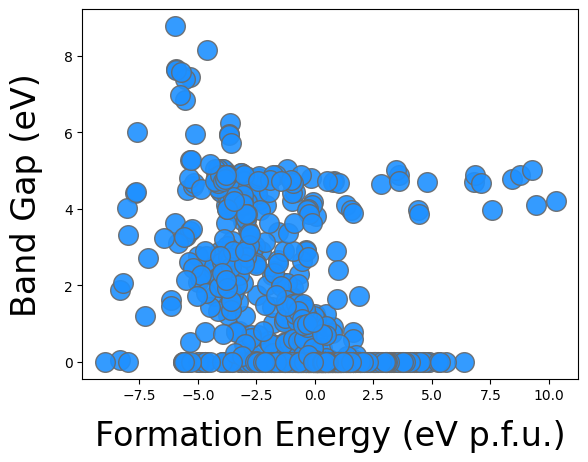

In [43]:
###   Visualize Data    ###

import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)
import matplotlib.font_manager

plt.scatter(Form, Gap, c='dodgerblue', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')

#plt.scatter(training_data["Decomposition Energy"], training_data["Band Gap"], marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')

#plt.scatter(training_data[training_data['MA'] == 0.0][training_data['FA'] == 0.0]["Decomposition Energy"], training_data[training_data['MA'] == 0.0][training_data['FA'] == 0.0]["Band Gap"], marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Inorganic')

#df = pd.DataFrame(training_data)
#plt.scatter(df.query('MA == 0.0 & FA == 0.0')["Decomposition Energy"], df.query('MA == 0.0 & FA == 0.0')["Band Gap"], marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Inorganic')
#lt.scatter(df.query('MA > 0.0 or FA > 0.0')["Decomposition Energy"], df.query('MA > 0.0 or FA > 0.0')["Band Gap"], marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Hybrid')

# plt.xlim([-0.7, 1.2])
# plt.ylim([0.0, 6.0])
# plt.xticks([-0.5, 0.0, 0.5, 1.0], fontsize=20)
# plt.yticks([0.0, 1.5, 3.0, 4.5, 6.0], fontsize=20)
plt.xlabel('Formation Energy (eV p.f.u.)', fontsize=24, labelpad=12)
plt.ylabel('Band Gap (eV)', fontsize=24, labelpad=15)
#plt.legend(bbox_to_anchor=(1.02,0.35), ncol=1, frameon=True, prop={'family':'Arial Narrow','size':24})
#plt.savefig('plot_decomp_gap.pdf', dpi=450)



In [ ]:
## Task 1, Data Visualization ##


In [44]:
elem_prop_all

,Element,Ion_rad,BP,MP,Density,At_wt,Cov_rad,Ion_Energy,Elec_Aff,At_vol,...,Sp_heat_cap,Therm_cond,Elec_cond,Heat_fusion,Heat_vap,Electronegativity,At_num,Period,Group,Ox_state
0,Li,0.76,1615.0,453.70,0.53,6.94,1.23,520.2,59.80,13.10,...,3.58,84.7,11.7,3.00,147.10,0.98,3,2,1,1
1,Na,1.02,1156.0,371.00,0.97,22.99,1.54,495.8,52.70,23.70,...,1.23,141.0,20.1,2.60,98.01,0.93,11,3,1,1
2,K,1.51,1033.0,336.80,0.86,39.10,2.03,418.8,48.36,45.46,...,0.76,102.5,16.4,2.33,76.90,0.82,19,4,1,1
3,Rb,1.61,961.0,312.63,1.53,85.47,2.16,403.0,46.89,55.90,...,0.36,58.2,47.8,2.34,69.20,0.82,37,5,1,1
4,Cs,1.74,944.0,301.54,1.87,132.91,2.35,375.7,45.49,71.07,...,0.24,35.9,5.3,2.09,67.74,0.79,55,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Ho,1.02,2968.0,1747.00,8.80,164.93,1.58,581.0,50.00,18.70,...,0.17,16.2,1.1,17.15,251.04,1.23,67,6,3,3
73,Er,1.00,3140.0,1802.00,9.07,167.26,1.57,589.0,50.00,18.40,...,0.17,14.3,1.2,17.15,292.88,1.24,68,6,3,3
74,Tm,1.09,2223.0,1818.00,9.32,168.93,1.56,596.0,50.00,18.10,...,0.16,16.8,1.3,16.80,191.00,1.25,69,6,3,3
75,Yb,0.99,1469.0,1092.00,6.97,173.04,1.70,603.0,50.00,24.79,...,0.15,34.9,3.7,7.70,128.00,1.10,70,6,3,3


In [46]:
## Task 2, Create Descriptors for Machine Learning ##

Desc_all = [[0.0 for a in range(10)] for b in range(len(training_data))]
for i in range(len(training_data)):
  for j in range(len(elem_prop_all)):

    if training_data["atom_A"][i] == elem_prop_all["Element"][j]:
      Desc_all[i][0] = Desc_all[i][0] + elem_prop_all["Ion_rad"][j]
    if training_data["atom_B"][i] == elem_prop_all["Element"][j]:
      Desc_all[i][0] = Desc_all[i][0] + elem_prop_all["Ion_rad"][j]

    if training_data["atom_A"][i] == elem_prop_all["Element"][j]:
      Desc_all[i][1] = Desc_all[i][1] + elem_prop_all["BP"][j]
    if training_data["atom_B"][i] == elem_prop_all["Element"][j]:
      Desc_all[i][1] = Desc_all[i][1] + elem_prop_all["BP"][j]

    if training_data["atom_A"][i] == elem_prop_all["Element"][j]:
      Desc_all[i][2] = Desc_all[i][2] + elem_prop_all["At_wt"][j]
    if training_data["atom_B"][i] == elem_prop_all["Element"][j]:
      Desc_all[i][2] = Desc_all[i][2] + elem_prop_all["At_wt"][j]

    if training_data["atom_A"][i] == elem_prop_all["Element"][j]:
      Desc_all[i][3] = Desc_all[i][3] + elem_prop_all["Ion_Energy"][j]
    if training_data["atom_B"][i] == elem_prop_all["Element"][j]:
      Desc_all[i][3] = Desc_all[i][3] + elem_prop_all["Ion_Energy"][j]

    if training_data["atom_A"][i] == elem_prop_all["Element"][j]:
      Desc_all[i][4] = Desc_all[i][4] + elem_prop_all["Elec_Aff"][j]
    if training_data["atom_B"][i] == elem_prop_all["Element"][j]:
      Desc_all[i][4] = Desc_all[i][4] + elem_prop_all["Elec_Aff"][j]

    if training_data["atom_A"][i] == elem_prop_all["Element"][j]:
      Desc_all[i][5] = Desc_all[i][5] + elem_prop_all["Sp_heat_cap"][j]
    if training_data["atom_B"][i] == elem_prop_all["Element"][j]:
      Desc_all[i][5] = Desc_all[i][5] + elem_prop_all["Sp_heat_cap"][j]

    if training_data["atom_A"][i] == elem_prop_all["Element"][j]:
      Desc_all[i][6] = Desc_all[i][6] + elem_prop_all["Elec_cond"][j]
    if training_data["atom_B"][i] == elem_prop_all["Element"][j]:
      Desc_all[i][6] = Desc_all[i][6] + elem_prop_all["Elec_cond"][j]

    if training_data["atom_A"][i] == elem_prop_all["Element"][j]:
      Desc_all[i][7] = Desc_all[i][7] + elem_prop_all["Heat_fusion"][j]
    if training_data["atom_B"][i] == elem_prop_all["Element"][j]:
      Desc_all[i][7] = Desc_all[i][7] + elem_prop_all["Heat_fusion"][j]

    if training_data["atom_A"][i] == elem_prop_all["Element"][j]:
      Desc_all[i][8] = Desc_all[i][8] + elem_prop_all["Heat_vap"][j]
    if training_data["atom_B"][i] == elem_prop_all["Element"][j]:
      Desc_all[i][8] = Desc_all[i][8] + elem_prop_all["Heat_vap"][j]

    if training_data["atom_A"][i] == elem_prop_all["Element"][j]:
      Desc_all[i][9] = Desc_all[i][9] + elem_prop_all["Electronegativity"][j]
    if training_data["atom_B"][i] == elem_prop_all["Element"][j]:
      Desc_all[i][9] = Desc_all[i][9] + elem_prop_all["Electronegativity"][j]



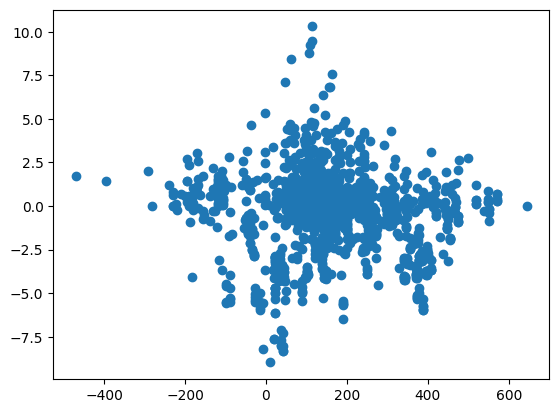

In [65]:
X = [0.0]*len(training_data)
for i in range(len(training_data)):
  X[i] = Desc_all[i][4]

plt.scatter(X, Form)


In [55]:
float(Form[i])

1.21

In [56]:
Desc_all[100][1]

np.float64(1395.18)

In [ ]:
## Task 3, Pearson Correlation Coefficients ##


In [ ]:
## Task 4, 2D projection of input data: PCA, MDS, t-SNE ##


In [ ]:
## Task 5, Linear regression models ##


In [ ]:
## Task 5, Random forest regression models ##


In [ ]:
## Task 5, Learning curves for RFR models ##


In [ ]:
## Classification models ##

In [ ]:
X_train, X_test, Form_train, Form_test, Formulas_train, Formulas_test = train_test_split(Descriptors, Form, Formula, test_size=0.2)


In [ ]:
## Random Forest Regression models ##

X_train, X_test, Form_train, Form_test, Formulas_train, Formulas_test = train_test_split(Descriptors, Form, Formula, test_size=0.2)

# param_grid = {"n_estimators": [50, 100, 200],
#              "max_features": [10, 20, 40],
#              "min_samples_leaf": [5,10,20],
#              "max_depth": [5,10,15],
#              "min_samples_split": [2, 5, 10]}

param_grid = {}

#rfr = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5)
rfr = RandomForestRegressor()

rfr.fit(X_train, Form_train)
Pred_train = rfr.predict(X_train)
Pred_test = rfr.predict(X_test)
rmse_test = np.sqrt( sklearn.metrics.mean_squared_error(Decomp_test, Pred_test) )
rmse_train = np.sqrt( sklearn.metrics.mean_squared_error(Decomp_train, Pred_train) )

print("Train RMSE: " + str(rmse_train))
print("Test RMSE: " + str(rmse_test))


Train RMSE: 0.03733173889131073
Test RMSE: 0.1035033329057304


In [ ]:
plt.scatter(Form_train, Pred_train, c='dodgerblue', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Training')
plt.scatter(Form_test, Pred_test, c='red', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Test')

# x = [-5000,0,5000]
# plt.plot(x,x, color='black', ls=':')
# plt.xlim([-0.7,1.1])
# plt.ylim([-0.7,1.1])
plt.legend(bbox_to_anchor=(1.02,0.35), ncol=1, frameon=True, prop={'family':'Arial Narrow','size':18})
